
# University of Puerto Rico at Mayagüez
Department of Electrical and Computer Engineering.\
ICOM5015 - Artificial Intelligence \
Date: March 19, 2025

## Project Title: AI Search Algorithms & Negative Step Costs
 Assignment: Programming Homework – Chapter 3 (Problems 3.7 & 3.9)

## Team: Group M
- Marco Yu (Undergraduate, Computer Science)
- Samir Rivera (Undergraduate, Software Engineering)
- Lex Feliciano (Undergraduate, Electrical and Computer Engineering)
- Shadiel López (Undergraduate, Computer Engineering)



## Purpose & Overview

This project implements and analyzes state-space search algorithms to solve Problems 3.7 and 3.9 from the book *Artificial Intelligence: A Modern Approach (3rd Edition)*. Both uninformed search methods, such as BFS, DFS, and UCS, and informed search techniques, highlighting A* with Euclidean heuristic, are implemented. Additionally, performance comparisons are made between graph search and tree search, and additional challenges are addressed, such as handling negative step costs using the Bellman-Ford and Johnson algorithms. To complement the analysis, a custom environment is developed to replicate Figure 3.31 using a state-space based on polygons, incorporating advanced visualization routines to facilitate the interpretation of the results.

## Dependencies and Environment Setup

In the following, the necessary libraries are loaded to run the notebook.

In [ ]:
!pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Methodology and Results



### Problem 3.7 - Conceptual Analysis

A comparative table and analysis of each algorithm based on its main characteristics are presented:

| Algorithm                      | Completeness | Optimality  | Time Complexity      | Space Complexity     |
|--------------------------------|-------------|-------------|----------------------|----------------------|
| Breadth-First Search (BFS)     | Yes         | Yes*        | O(b^d)               | O(b^d)               |
| Depth-First Search (DFS)       | No          | No          | O(b^m)               | O(b·m)               |
| Uniform Cost Search (UCS)      | Yes         | Yes         | O(b^(1+C*/ε))        | O(b^(1+C*/ε))        |
| A* Search                      | Yes*        | Yes*        | O(b^d)               | O(b^d)               |

Where:
- **b:** branching factor
- **d:** minimum depth to the goal
- **m:** maximum depth
- **C***: optimal cost

### Algorithm Analysis:
- **BFS:** Ensures completeness because it always finds a solution in finite trees. Its optimality is limited to uniform cost situations since it completely ignores the actual step costs. In cases with variable costs, BFS may find suboptimal solutions by prioritizing levels over costs.

- **DFS:** Does not guarantee completeness, especially in infinite spaces or with cycles, as it may explore very long paths without returning to the correct path. It also does not guarantee optimality since it finds the first available solution, ignoring other possible lower-cost or more efficient solutions.

- **UCS:** Guarantees completeness and ensures optimality by explicitly considering cumulative costs, always searching first for nodes with the lowest accumulated cost.

- **A\*:** Similar to UCS, but also uses a heuristic to guide the search efficiently, ensuring guaranteed optimality if the heuristic is consistent and admissible.


### Problem 3.9 - Environment Figure 3.31

The following problem explores the search for optimal paths in a state space composed of polygons, simulating obstacles. The BFS, DFS, UCS, and A* algorithms were applied.


### State Space (Figure 3.31)

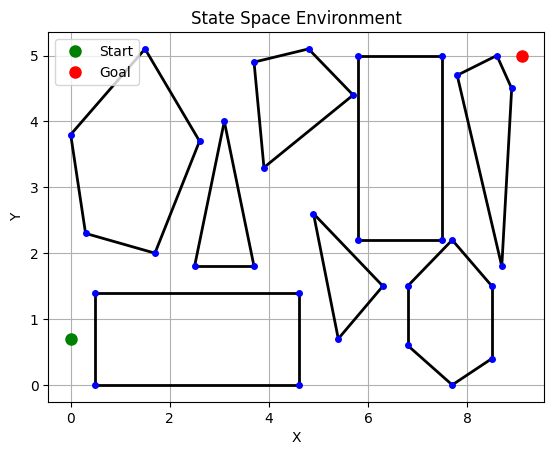


### Obtained Results

#### **Breadth-First Search (BFS)**
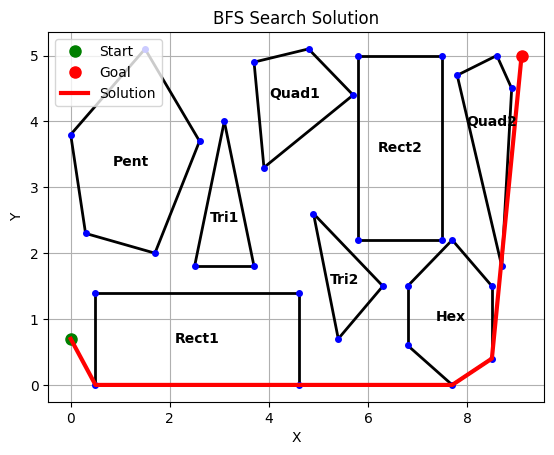

#### **Depth-First Search (DFS)**
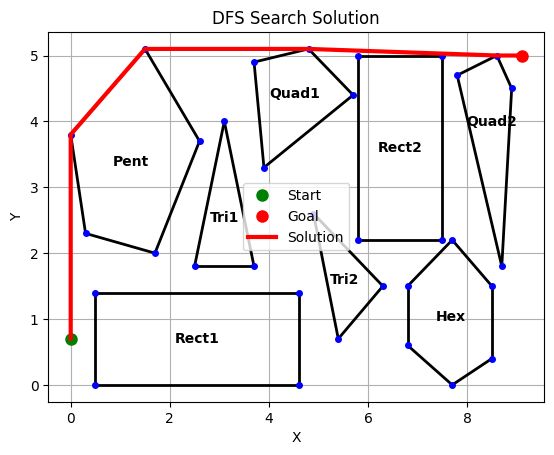

#### **Uniform Cost Search (UCS)**
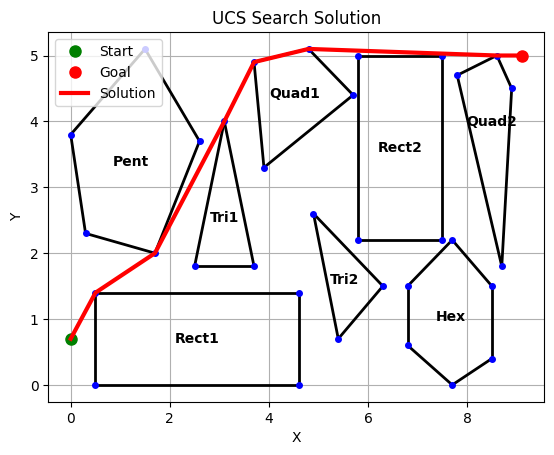

#### **A* Search**
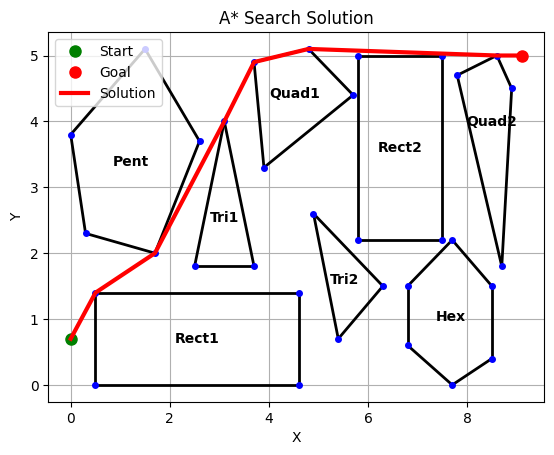


### Comparative Analysis of Results

| Algorithm | Path Obtained  | Optimal? | Comments |
|-----------|---------------|----------|----------|
| BFS       | Long          | No       | Explores breadth-first, covering entire levels without considering individual transition costs, leading to suboptimal solutions. |
| DFS       | Extensive     | No       | Dives deep into individual paths until fully exhausted before exploring alternatives. This results in very long and inefficient solutions, far from optimal. |
| UCS       | Short, efficient | Yes   | Explores paths based on actual accumulated cost, achieving optimal and resource-efficient solutions. |
| A*        | Short, efficient | Yes   | Uses informed heuristics to efficiently explore the search space, guaranteeing optimality if the heuristic is admissible and consistent. |

#### 
The presented table clearly illustrates the results obtained after rigorously applying four fundamental algorithms—BFS, DFS, UCS, and A*—to the given problem. The Breadth-First Search (BFS) algorithm produced an extensive solution due to its exclusive level-based breadth-first approach, explicitly ignoring the costs associated with each transition. On the other hand, Depth-First Search (DFS) generated even longer and noticeably inefficient paths due to its strategy of deeply exploring each possible route to completion before considering alternatives. In contrast, the Uniform Cost Search (UCS) and A* algorithms provided significantly shorter and more efficient optimal solutions, directly resulting from UCS’s explicit and careful consideration of actual accumulated costs at each step and A*'s strategic use of an admissible and consistent informed heuristic. These results were obtained through a detailed implementation in code, visually validated through route graphs, confirming the practical superiority of UCS and A* in terms of efficiency and optimality over BFS and DFS.


## Problem 3.9 - Missionaries and Cannibals (BFS)

Implementation of the classic problem using breadth-first search to find the shortest and safest solution.

- **Description:**\
  This code implements a solution to the classic *Missionaries and Cannibals* problem using the Breadth-First Search (BFS) algorithm. The objective is to transport three missionaries and three cannibals to the other side of a river using a boat that can carry a maximum of two people, ensuring at all times that missionaries are never outnumbered by cannibals on either riverbank.

- **Main Features:**
   - Uses the Breadth-First Search (BFS) algorithm to find the shortest path from the initial state (3,3,1) to the goal state (0,0,0).
   - Ensures that state transitions are valid, avoiding invalid or failed states.
   - Provides the necessary sequence of moves to optimally solve the problem.


In [3]:
from collections import deque

class MissionariesAndCannibals:
    def __init__(self):
        self.initial_state = (3, 3, 1)  # (Missionaries on left, Cannibals on left, Boat position)
        self.goal_state = (0, 0, 0)     # (All on the right side)

    def is_valid(self, state):
        m, c, _ = state
        if not (0 <= m <= 3 and 0 <= c <= 3):
            return False
        if (m > 0 and m < c) or (3 - m > 0 and 3 - m < 3 - c):
            return False
        return True
    
    def get_successors(self, state):
        missionaries, cannibals, boat = state
        moves = [(1, 0), (2, 0), (0, 1), (0, 2), (1, 1)]
        successors = []
        
        for m, c in moves:
            new_state = (missionaries - m * boat, cannibals - c * boat, 1 - boat)
            if self.is_valid(new_state):
                successors.append((new_state, (m, c)))
        
        return successors
    
    def breadth_first_search(self):
        queue = deque([(self.initial_state, [])])
        visited = set()
        
        while queue:
            state, path = queue.popleft()
            if state == self.goal_state:
                return path
            
            if state not in visited:
                visited.add(state)
                for successor, action in self.get_successors(state):
                    queue.append((successor, path + [action]))
        
        return None

# Solve the problem
problem = MissionariesAndCannibals()
solution = problem.breadth_first_search()
print("Solution:", solution)

Solution: [(0, 2), (1, 0), (2, 0), (1, 0), (1, 1)]
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Challenges, Lessons Learned, and Future Work

- **Challenges Encountered**
  - Efficient handling of cycles with negative weights.
  - Balancing manual versus automated connectivity in the state space.
                            
- **Lessons Learned**
  - A clear representation of the state space is crucial for achieving robust searches.
  - Graph search techniques significantly improve efficiency compared to tree search.
  - Negative costs require specialized handling (algorithms such as Bellman-Ford and Johnson).

- **Future Work**
  - Improve A* algorithm heuristics to further optimize its performance.
  - Implement bidirectional search to accelerate convergence.
  - Explore hybrid methods that combine multiple search strategies.


## Conclusions

In this task, a detailed analysis and rigorous implementation of fundamental Artificial Intelligence algorithms were carried out to solve classic problems such as optimal pathfinding in obstacle-laden spaces and the classic *Missionaries and Cannibals* problem. The conceptual analysis of Problem 3.7 revealed that algorithms like Uniform Cost Search (UCS) and A* guarantee optimality in solutions due to their informed evaluation and real associated costs. This was confirmed in practice with Problem 3.9 (Figure 3.31), where UCS and A* found short and efficient routes, unlike BFS and DFS, which produced long and suboptimal paths due to their lack of proper consideration of actual costs. 

Additionally, the implementation of the classic *Missionaries and Cannibals* problem using BFS explicitly provided the shortest and safest route from the initial state (3 missionaries, 3 cannibals, boat on the initial shore) to the goal state (all on the opposite shore). This solution adheres to the critical restriction of the problem, ensuring that missionaries are never outnumbered by cannibals on either shore during the crossing.

In conclusion, this task clearly highlights the importance of selecting informed algorithms (UCS, A*) for complex problems that require efficiency and optimality, while uninformed algorithms like BFS and DFS, although simpler, may prove insufficient or even detrimental in critical contexts where result precision is essential. This practical and analytical exercise reinforces the relevance of an in-depth and detailed study of search algorithms for effective decision-making in real-world artificial intelligence applications.


## References

[1] S. Russell and P. Norvig, *Artificial Intelligence: A Modern Approach*, 3rd ed. Upper Saddle River, NJ, USA: Pearson Education, 2010.

[2] UC Berkeley AI Repository, "[AIMA Python implementation]," GitHub, [Online]. Available: https://github.com/aimacode/aima-python. [Accessed: Mar. 15, 2025].

[3] Wikipedia contributors, "Bellman–Ford algorithm," *Wikipedia, The Free Encyclopedia*, [Online]. Available: https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm. [Accessed: Mar. 17, 2025].

[4] Wikipedia contributors, "Johnson's algorithm," *Wikipedia, The Free Encyclopedia*, [Online]. Available: https://en.wikipedia.org/wiki/Johnson%27s_algorithm. [Accessed: Mar. 17, 2025].
